In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## import dataset
dataset=pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [4]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [6]:
## implement thompson sampling
import random

N=10000
d=10
ads_selected=[]
number_of_rewards_1=[0]*d
number_of_rewards_0=[0]*d
total_reward=0

for n in range(0,N):
    ad=0
    max_random=0
    for i in range(0,d):
          random_beta=random.betavariate(number_of_rewards_1[i]+1,number_of_rewards_0[i]+1)
        
          if random_beta>max_random:
                max_random=random_beta
                ad=i
    ads_selected.append(ad)           
    reward=dataset.values[n,ad]
    if reward==1:
        number_of_rewards_1[ad]=number_of_rewards_1[ad]+1
    else:
        number_of_rewards_0[ad]=number_of_rewards_0[ad]+1
    total_reward+= reward   

Text(0, 0.5, 'No. of times the ad was selected')

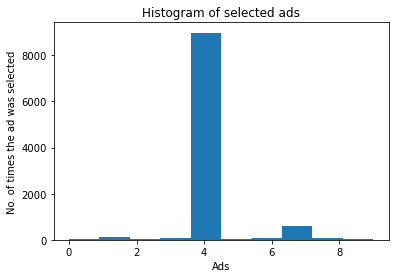

In [8]:
###  visualize the results
plt.hist(ads_selected)
plt.title("Histogram of selected ads")
plt.xlabel("Ads")
plt.ylabel("No. of times the ad was selected")